In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd 


In [3]:
blagues_Chuck_Norris = []
def scraper_page(url):
    
    navigator = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1)'
    response = requests.get(url,headers={'User-Agent': navigator},verify=False)

    soup = BeautifulSoup(response.text, 'html.parser')
    cards = soup.findAll("div",{"class":"card"})

    for c in cards:
        news_c = {}
        news_c['Blague'] = c.p.text
        news_c['Note'] = c.span.text
        blagues_Chuck_Norris.append(news_c)
    
    return blagues_Chuck_Norris 
    
    


In [4]:
def scraper_pages(urls):
    for url in urls:
        scraper_page(url)

In [5]:
urls_to_scrape = [
    "https://www.chucknorrisfacts.fr/facts/top/1",
    "https://www.chucknorrisfacts.fr/facts/top/2",
    "https://www.chucknorrisfacts.fr/facts/top/3",
    "https://www.chucknorrisfacts.fr/facts/top/4",
    "https://www.chucknorrisfacts.fr/facts/top/5"
]

In [6]:

scraper_pages(urls_to_scrape)

C:\Users\aurel\AppData\Roaming\Python\Python311\site-packages\urllib3\connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.chucknorrisfacts.fr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\aurel\AppData\Roaming\Python\Python311\site-packages\urllib3\connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.chucknorrisfacts.fr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\aurel\AppData\Roaming\Python\Python311\site-packages\urllib3\connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.chucknorrisfacts.fr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-war

In [7]:
blagues_Chuck_Norris

[{'Blague': "Les ennemis des amis de Chuck Norris sont ses amis. Et oui! Les ennemis de Chuck Norris n'existent plus.",
  'Note': '(8.87/10)'},
 {'Blague': "L'avenir se demande parfois ce que Chuck Norris lui réserve.",
  'Note': '(8.43/10)'},
 {'Blague': "Un jour Chuck Norris a eu un zero en latin, depuis c'est une langue morte.",
  'Note': '(8.43/10)'},
 {'Blague': 'Chuck Norris ne sait pas à quoi ressemble Nicolas Sarkozy,  en effet Chuck Norris ne baisse jamais les yeux.',
  'Note': '(8.41/10)'},
 {'Blague': '', 'Note': '(8.37/10)'},
 {'Blague': "Chuck Norris n'a pas de père. On ne nique pas la mère de Chuck Norris.",
  'Note': '(8.34/10)'},
 {'Blague': "Chuck Norris ne ment pas, c'est la vérité qui se trompe.",
  'Note': '(8.33/10)'},
 {'Blague': 'Les samouraïs tuent des mouches avec leurs sabres...Chuck Norris, lui, tue des samouraïs avec des mouches',
  'Note': '(8.32/10)'},
 {'Blague': "Cherchez l'intrus : Un rouge-gorge, un pigeon, un moineau et Chuck Norris.Réponse : Un rouge

In [8]:
df_blagues_Chuck_Norris = pd.DataFrame(blagues_Chuck_Norris)

In [14]:
df_blagues_Chuck_Norris['Note']=df_blagues_Chuck_Norris['Note'].apply(lambda x: x.replace("/10)","").replace("(",""))
df_blagues_Chuck_Norris['Note']=df_blagues_Chuck_Norris['Note'].apply(lambda x: float(x))

C:\Users\aurel\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


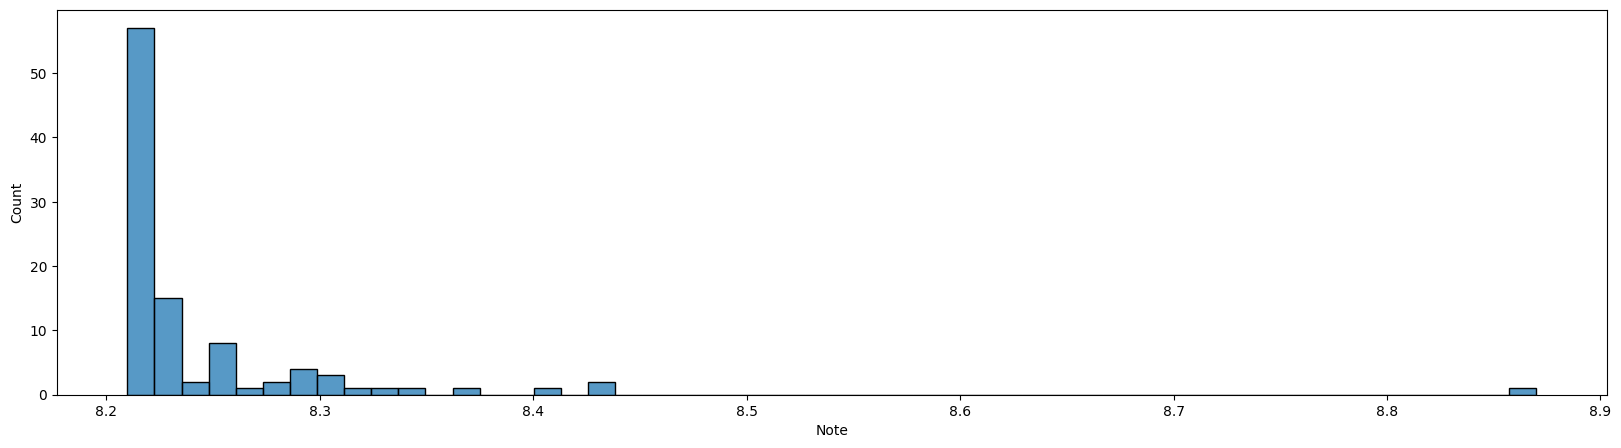

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,5))
ax = sns.histplot(df_blagues_Chuck_Norris['Note'])